# Sistemas de tempo discreto

Renato Naville Watanabe

Sistemas de tempo discreto são dispositivos, processos ou objetos que aceitam como entrada um sinal de tempo discreto e devolvem como sinal de saída um sinal de tempo discreto.


<img src=discsis.png width="400">

Exemplos de sistemas de tempo discreto são

Um sistema pode ser descrito de diferentes maneiras

## Descrição Verbal

## Equações de diferenças

Equações de diferenças são equações que relacionam dois sinais ($x[n]$ e $y[n]$) através de uma expressão algébrica.

## Propriedades dos sistemas discretos

Os sistemas de tmpo discretos podem ter ou não ter as seguintes propriedades.

### Causalidade

Um sistema é **causal** se a sua saída $y[n]$ depende apenas dos valores da entrada e saída até o instante $n$. Por exemplo:

$y[n] = 0.2y[n-1] + x[n]$

é um sistema causal.

Se a saída $y[n]$ de um sistema depende de valores da entrada e saída em instantes maiores do que $n$ o sistema é **não-causal**. Por exemplo:

$y[n] = \frac{x[n+1]+x[n]+x[n-1]}{3}$

é um sistema não causal.


### Memória

Um sistema tem memória se a saída desse sistema no intante $n$ depende de valores do sinal de entrada em valores diferentes de $n$ (passado ou futuro).

Por exemplo, o sistema com a seguinte equação de diferenças:

$$y[n] = 0.4y[n-1] + x[n-2] $$

é um sistema com memória. Chamamos os sistemas com memória de **sistemas dinâmicos**.

O seguinte sistema:

$$y[n] =0.3x[n] $$

é um sistema sem memória. Chamamos os sistemas sem memória de **sistemas estáticos**.

### Linearidade


Um **sistema linear** é um sistema que segue o princípio da sobreposição. 

<img src=lineardisc.png width="800">

Por exemplo, o sistema:

$$y[n] = 0.5y[n-1] - 0.3y[n-2] + x[n]$$

Podemos usar como entrada, por exemplo, $x_1[n] = u[n]$ e uma outra entrada $x_2[n] = \cos\left(\frac{\pi n}{15}\right)$. As saídas deste sistema em cada um dos casos são mostradas abaixo:

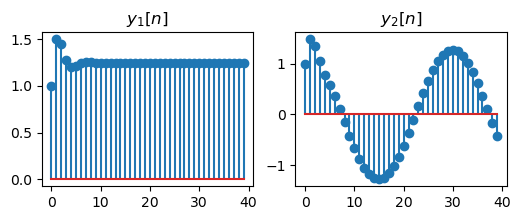

In [52]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x1 = np.ones(N)
y1 = np.zeros(N)
for n in range(N):
    y1[n] = 0.5*y1[n-1] - 0.3*y1[n-2] + x1[n]
plt.stem(y1)
plt.title('$y_1[n]$')
plt.subplot(1,2,2)
x2 = np.cos(np.pi*np.arange(N)/15)
y2 = np.zeros(N)
for n in range(N):
    y2[n] = 0.5*y2[n-1] - 0.3*y2[n-2] + x2[n]
plt.stem(y2)
plt.title('$y_2[n]$');

Podemos agora construir um outro sinal de entrada, $x_3[n] = x_1[n] + x_2[n]$. Se esse sistema for linear, a saída do sistema para essa entrada deverá ser $y_1[n]+y_2[n]$. Abaixo estão os gráficos da saída do sistema para $x_3[n]$ e $y_1[n]+y_2[n]$.

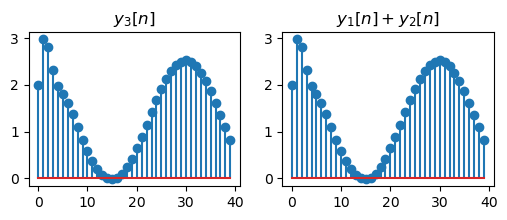

In [53]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x3 = np.ones(N) + np.cos(np.pi*np.arange(N)/15)
y3 = np.zeros(N)
for n in range(N):
    y3[n] = 0.5*y3[n-1] - 0.3*y3[n-2] + x3[n]
plt.stem(y3)
plt.title('$y_3[n]$')
plt.subplot(1,2,2)
plt.stem(y1+y2)
plt.title('$y_1[n]+y_2[n]$');

As saídas são iguais, então concluímos que o sistema é linear.

Caso o sistema não siga o princípio da sobreposição, o dizemos que é um **sistema não linear**. Por exemplo, o sistema:

$$y[n] = 0.1y[n-1]^2 + x[n]^2$$

Se usarmos as entradas $x_1[n]=\delta[n]$ e $x_2[n]= \cos\left(\frac{\pi n}{15}\right)$, obtemos as seguintes saídas.

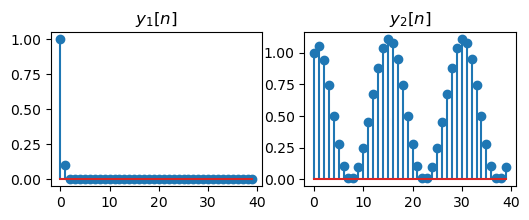

In [58]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x1 = np.zeros(N)
x1[0] = 1
y1 = np.zeros(N)
for n in range(N):
    y1[n] = 0.1*y1[n-1]**2  + x1[n]**2
plt.stem(y1)
plt.title('$y_1[n]$')
plt.subplot(1,2,2)
x2 = np.cos(np.pi*np.arange(N)/15)
y2 = np.zeros(N)
for n in range(N):
    y2[n] = 0.1*y2[n-1]**2 + x2[n]**2
plt.stem(y2)
plt.title('$y_2[n]$');

Agora, usando a entrada $x_3[n] = x_1[n]+x_2[n]$, se o sistema for linear, a saída do sistema deve ser $y_1[n]+y_2[n]$. Abaixo são mostradas a saída $y_3[n]$ e $y_1[n]+y_2[n]$.

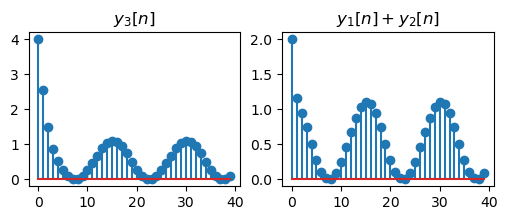

In [60]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x3 = np.zeros(N)
x3[0] = 1
x3 = x3 + np.cos(np.pi*np.arange(N)/15)
y3 = np.zeros(N)
for n in range(N):
    y3[n] = 0.1*y3[n-1]**2 + x3[n]**2
plt.stem(y3)
plt.title('$y_3[n]$')
plt.subplot(1,2,2)
plt.stem(y1+y2)
plt.title('$y_1[n]+ y_2[n]$');

Como é possível observar pelos gráficos $y_3[n]\neq y_1[n]+y_2[n]$ e portanto o sistema é não linear.

### Invariância no tempo

Um sistema é dito ser **invariante no tempo** se colocarmos a mesma entrada em momentos diferentes, as saídas obtidas serão as mesmas, exceto pela diferença no tempo.

<img src=ITsisdisc.png width="800">

Um sistema que não segue essa propriedade é dito ser **variante no tempo**.

Por exemplo, vamos considerar o sistema que calcula a média móvel de 4 passos de tempo da entrada $x[n]$:

$$y[n] = \frac{x[n]+x[n-1]+x[n-2]+x[n-3]}{4}$$

Considere o seguinte par de entrada e saída deste sistema, mostrados nos gráficos abaixo:


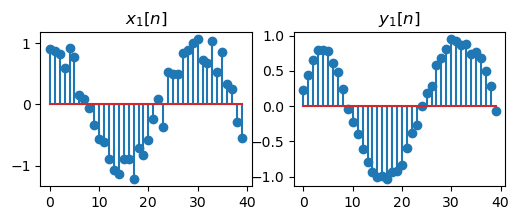

In [74]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
rng = np.random.default_rng()
x1 = np.cos(np.pi*np.arange(N)/15) + 0.2*rng.normal(size=N)
y1 = np.zeros(N)
for n in range(0,N):
    if n == 0:
        y1[n] = x1[n]/4
    elif n == 1:
        y1[n] = (x1[n]+x1[n-1])/4
    elif n == 2:
        y1[n] = (x1[n]+x1[n-1]+x1[n-2])/4
    else:
        y1[n] = (x1[n]+x1[n-1]+x1[n-2]+x1[n-3])/4
plt.stem(x1)
plt.title('$x_1[n]$')
plt.subplot(1,2,2)
plt.stem(y1)
plt.title('$y_1[n]$');

Agora vamos colocar a mesma entra entrada, porém atrasada de 10 passos de tempo ($x_2[n] = x_1[n-10]$).

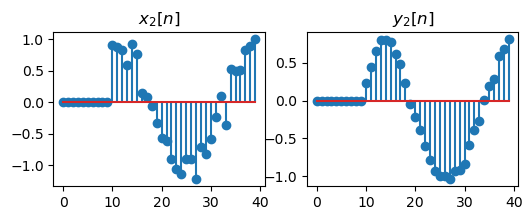

In [75]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x2 = np.zeros(N)
x2[10:] = x1[0:30]
y2 = np.zeros(N)
for n in range(3,N):
    if n == 0:
        y2[n] = x2[n]/4
    elif n == 1:
        y2[n] = (x2[n]+x2[n-1])/4
    elif n == 2:
        y2[n] = (x2[n]+x2[n-1]+x2[n-2])/4
    else:
        y2[n] = (x2[n]+x2[n-1]+x2[n-2]+x2[n-3])/4
plt.stem(x2)
plt.title('$x_2[n]$')
plt.subplot(1,2,2)
plt.stem(y2)
plt.title('$y_2[n]$');

Podemos observar que a saída $y_2[n]$ é igual a $y_1[n]$, porém atrasado de 10 passos. Isso acontece que porque esse sistema invariante no tempo.

Vamos pegar outro exemplo de sistema:

$$y[n] = n\frac{x[n]+x[n-1]+x[n-2]+x[n-3]}{4}$$

Considere o seguinte par de entrada e saída deste sistema, mostrados nos gráficos abaixo:

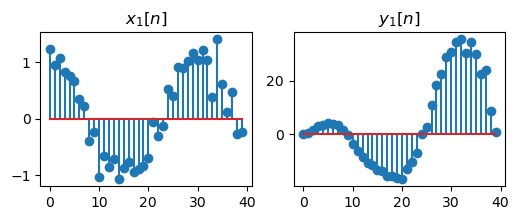

In [76]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
rng = np.random.default_rng()
x1 = np.cos(np.pi*np.arange(N)/15) + 0.2*rng.normal(size=N)
y1 = np.zeros(N)
for n in range(0,N):
    if n == 0:
        y1[n] = n*x1[n]/4
    elif n == 1:
        y1[n] = n*(x1[n]+x1[n-1])/4
    elif n == 2:
        y1[n] = n*(x1[n]+x1[n-1]+x1[n-2])/4
    else:
        y1[n] = n*(x1[n]+x1[n-1]+x1[n-2]+x1[n-3])/4
plt.stem(x1)
plt.title('$x_1[n]$')
plt.subplot(1,2,2)
plt.stem(y1)
plt.title('$y_1[n]$');

Agora vamos colocar a mesma entra entrada, porém atrasada de 10 passos de tempo ($x_2[n] = x_1[n-10]$).

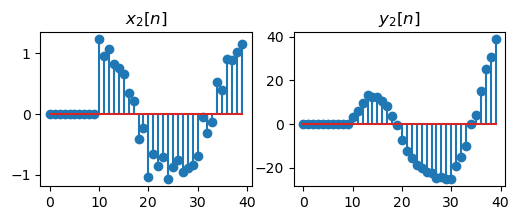

In [77]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
N = 40
x2 = np.zeros(N)
x2[10:] = x1[0:30]
y2 = np.zeros(N)
for n in range(3,N):
    if n == 0:
        y2[n] = nx2[n]/4
    elif n == 1:
        y2[n] = n*(x2[n]+x2[n-1])/4
    elif n == 2:
        y2[n] = n*(x2[n]+x2[n-1]+x2[n-2])/4
    else:
        y2[n] = n*(x2[n]+x2[n-1]+x2[n-2]+x2[n-3])/4
plt.stem(x2)
plt.title('$x_2[n]$')
plt.subplot(1,2,2)
plt.stem(y2)
plt.title('$y_2[n]$');

Podemos observar que a saída $y_2[n]$ não é igual a $y_1[n]$ atrasado de 10 passos. Ela tem uma outra forma. Isso acontece que porque esse sistema é variante no tempo.

### Estabilidade

O conceito de estabilidade é bem importante e será explorado bastante ao longo do curso, bem como em outros cursos (particularmente em disciplinas que envolvam Controle). Intuitivamente, o conceito um sistema intável é um sistema cuja saída se descontrola (aumenta ou diminui de forma indefinida) mesmo com uma entrada pequena, ou que não cresça para sempre. Por exemplo, um sistema acumulador (que soma todos os valores que recebe como entrada), mesmo se recebe como entrada um sinal que não vai para o infinito (como um degrau), a saída aumenta indefinidamente:

$$y[n] = y[n-1] + x[n] $$

Se usarmos o sinal degrau $u[n]$ como entrada, a sua saída tem o seguinte gráfico:

<StemContainer object of 3 artists>

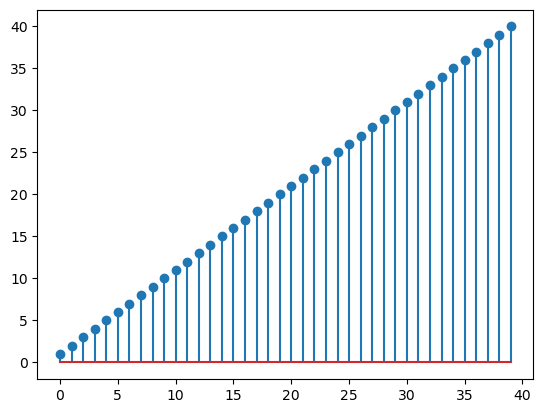

In [34]:
import matplotlib.pyplot as plt
import numpy as np

N = 40
x = np.zeros(N)
y = np.ones(N)
for n in range(1,N):
    x[n] = 1
    y[n] = 1.0*y[n-1] + x[n]
plt.stem(y)


Pode-se observar que ela cresce indefinidamente. Isso caracteriza o sistema como instável (geralmente o sistema ser instável é uma característica ruim, que os sistemas de Controle tentam resolver).

Formalmente, podemos definir um **sistema estável** como sendo um sistema que se receber uma entrada finita:

$$|x[n]| < B \text{ ,para qualquer } n $$

em que $B$ é um número real finito, então:

$$|y[n]| < L \text{ .para qualquer } n$$

em que $L$ é um outro número real finito.

Um sistema que não respeita o critério acima é chamado de **sistema instável**.

Um exemplo de sistema estável é o que tem a seguinte equação de diferenças:

$$y[n] = 0.3y[n-1] + x[n] $$

Se usarmos o sinal degrau como entrada deste sistema, a saída terá o seguinte gráfico:

<StemContainer object of 3 artists>

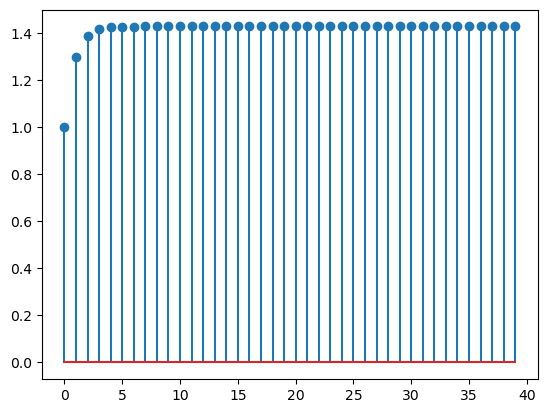

In [35]:
N = 40
x = np.zeros(N)
y = np.ones(N)
for n in range(1,N):
    x[n] = 1
    y[n] = 0.3*y[n-1] + x[n]
plt.stem(y)

Como uma última nota a respeito de estabilidade, o critério mostrado acima é apenas uma maneira de definir estabilidade, conhecido como **BIBO** (*Bounded Input Bounded Output*, Entrada Limitada, Saída Limitada). Existem outros critérios, como a definição de Lyapunov ou estabilidade assintótica,  normalmente vistos em disciplinas de Controle. Neste curso, sempre que for mencionado estabilidade, será de acordo com o critério BIBO.

### Invertibilidade

Um sistema é dito ser um **sistema invertível** se para entradas diferentes o sistema gera saídas diferentes. Caso o sistema for invertível é possível encontrar o seu **sistema inverso**. Se usarmos como entrada de um sistema inverso do sistema S1 a saída do sistema S1 $y_1[n]$ devemos obter a entrada $x_1[n]$.

<img src=inversesisdisc.png width="800">

Por exemplo, o sistema acumulador:

$$y[n] = y[n-1] + x[n]$$

Temos como sistema inverso:

$$y[n] = x[n] - x[n-1] $$

Para obter esse sistema, basta isolar o sinal $x[n]$ e trocar os os nomes de $x$ e $y$ (apenas para manter o padrão de usar $x$ como entrada e $y$ como saída).


Um outro exemplo é o sistema abaixo:

$y[n] = x[n]^2$

Esse é um **sistema não invertível**. Podemos deduzir isso observando que a entrada $x_1[n]=u[n]$ e a entrada $x_2[n]=-u[n]$ geram a mesma saída.


## Sistemas que serão estudados no restante do curso

O restante do curso se restringirá à classe de sistemas **lineares** e **invariantes no tempo** (às vezes se usa a sigla **SLIT**). Essa restrição acontece por dois principais motivos:

- a maioria dos sistemas encontrados em Engenharia tem essa característica (ou podem ser simplificados para podermos considerar que eles têm essa característica).

- existem muitos métodos para tratar esses sistemas. São esses métodos que veremos ao longo do curso.

É muito importante saber definir o sistema com o qual se está trabalhando. Se não for um sistema linear e invariante no tempo, os métodos que aprenderemos no curso não funcionarão.

## Exercícios

**1)** Um sistema linear recebe o sinal $x_1[n]$ e dá como resposta $y_1[n]$.

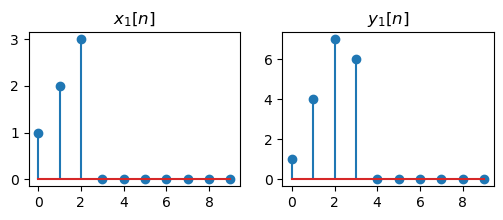

In [18]:

plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
n = np.arange(10)
x = np.zeros_like(n)
x[0] = 1
x[1] = 2
x[2] = 3
y = np.zeros_like(n)
y[0] = 1
y[1] = 4
y[2] = 7
y[3] = 6
plt.stem(n, x)
plt.title('$x_1[n]$')
plt.subplot(1,2,2)
plt.stem(n, y)
plt.title('$y_1[n]$');

O mesmo sistema linear, quando recebe o sinal $x_2[n]$ dá como resposta o sinal $y_2[n]$.

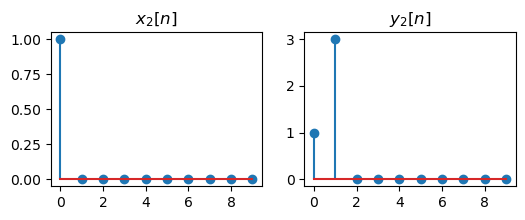

In [20]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
n = np.arange(10)
x = np.zeros_like(n)
x[0] = 1
y = np.zeros_like(n)
y[0] = 1
y[1] = 3
plt.stem(n, x)
plt.title('$x_2[n]$')
plt.subplot(1,2,2)
plt.stem(n, y)
plt.title('$y_2[n]$');

Esse sistema é invariante no tempo?

**2)** Entre os sistemas abaixo, quais são lineares e quais são invariantes no tempo:

a) $y[n] = nx[n]$

b) $y[n] = x[n] + 1$

c) $y[n] + 2y[n-1] = 3x[n] + nx[n-1]$

d) $y[n] + 2y[n-1] = 3x[n] + 4x[n-1]$

**3)** Um sistema $S$ é composto de dois subsistemas ($S_1$ e $S_2$), ligados em série com o subsistema $S_1$ seguido do subsistema $S_2$ (a saída do sistema $S_1$ é a entrada do sistema $S_2$).

O subsistema $S_1$ tem a seguinte equação de diferenças:

$y_1[n] = 2x_1[n] + 4x_1[n-1]$

O subsistema $S_2$ tem a seguinte equação de diferenças:

$y_2[n] = x_2[n-2]+0.5x_2[n-3]$

Determine a relação entrada-saída do sistema $S$. Se a ordem dos subsistemas  se inverter ($S_2$ antes do $S_1$), a  relação entrada-saída do sistema resultante muda? Porquê?

**4)** Um sistema é descrito por:

$$y[n] = \frac{1}{2}\displaystyle\sum_{k=-\infty}^\infty x[k](\delta[n-k] + \delta[n+k]) $$

a) O que o sistema faz?

b) O sistema é estável (BIBO)? O sistema é linear? O sistema tem memória? O sistema é causal? O sistema é invariante no tempo?

**5)** Determine se os sistemas abaixo têm as seguintes propriedades: memória, invariante no tempo, linear, causal, estável:

a) $y[n] = x[-n]$

b) $y[n] = x[n-2] - 2x[n-8]$

c) $y[n] = nx[n]$

d) $y[n] = \text{Par}\{ x[n-1]\}$

e) $y[n] = \left\{ \begin{array}{cc}x[n]& ,n\geq 1 \\ 0& ,n=0 \\ x[n+1]&,n\geq -1\end{array}\right.$

f) $y[n] = x[4n+1]$

**6)** Determine se os seguintes sistemas são invertíveis. Se forem, encontre o sistema inverso. Se não forem, encontre dois sinais de entrada que tenham a mesma saída:

a) $y[n] = nx[n]$

b) $ y[n] = \left\{ \begin{array}{cc}x[n-1]& ,n\geq 1 \\ 0& ,n=0 \\ x[n]&,n\geq -1\end{array}\right.$

c) $y[n] = x[n]x[n-1]$

d) $y[n] = x[1-n]$

e) $y[n] = \displaystyle\sum_{k=-\infty}^n\left(\frac{1}{2}\right)^{n-k}x[k]$

f) $y[n] = \left\{ \begin{array}{cc}x[n+1]& ,n\geq 0 \\ x[n]& ,n<0 \end{array}\right.$

g) $y[n] = x[2n]$

h)  $y[n] = \left\{ \begin{array}{cc}x[n/2]& ,n \text{ par} \\ 0& ,n \text{ ímpar}\end{array}\right.$

**7)** Considere um sistema com a seguinte equação de diferenças:

$$y[n] = x[n]x[n-2]$$

Esse sistema tem um sistema inverso? O sistema tem memória? Qual a saída do sistema quando $x[n]=A\delta[n]$, com $A$ sendo um número complexo qualquer?

**8)** A saída $y[n]$ de um caixa de supermercado é o custo total de $n$ itens registrados pelo caixa. A entrada $x[n]$ é o custo do n-ésimo item. Escreva a equação de diferenças que relacione $y[n]$ com $x[n]$.



## Referências

- Oppenheim, M. Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007